In [161]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import seaborn as sns
import numpy as np

from urlextract import URLExtract
from collections import Counter
import emoji

In [162]:
f = open('WhatsApp Chat with QnAs.txt','r',encoding = 'utf-8')

In [163]:
data = f.read()

In [164]:
print(data)

20/04/22, 09:05 - Aman IIT: <Media omitted>
22/04/22, 11:50 - Satvik Meta: <Media omitted>
06/09/22, 14:02 - Priyanshu Patel: @Ankit proxy maar dena
01/11/22, 08:16 - Parikshit Meta: <Media omitted>
12/11/22, 10:58 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
12/11/22, 16:04 - Satyam META: Help me be among the top 8 lakh teams and get assured team rewards of up to ₹350 https://gpay.app.goo.gl/XtyZNZ
12/11/22, 22:45 - Aman IIT: <Media omitted>
12/11/22, 23:21 - Aditya Meta: Jamane ko jis din yaad aapki aa gyi
Direct game over
12/11/22, 23:27 - Sushil Meta: https://fb.watch/gLC2tyvAbC/
13/11/22, 10:06 - Rishit Meta: <Media omitted>
13/11/22, 11:10 - Sushil Meta: Ye maliyo mtlb kya hota hai
13/11/22, 11:47 - Aman IIT: <Media omitted>
13/11/22, 11:51 - Satvik Meta: Sbke sb nikamme hai
13/11/22, 11:51 - Satvik Meta: Malaiyo pachega nhi
13/11/22, 17:08 - Sagun IIT BHU META: mdf ka kha se pdh rhe 

In [165]:
# writting regular expression string
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{1,2}\s-\s'

In [166]:
messages = re.split(pattern,data)[1:]
messages

['Aman IIT: <Media omitted>\n',
 'Satvik Meta: <Media omitted>\n',
 'Priyanshu Patel: @Ankit proxy maar dena\n',
 'Parikshit Meta: <Media omitted>\n',
 'Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'Satyam META: Help me be among the top 8 lakh teams and get assured team rewards of up to ₹350 https://gpay.app.goo.gl/XtyZNZ\n',
 'Aman IIT: <Media omitted>\n',
 'Aditya Meta: Jamane ko jis din yaad aapki aa gyi\nDirect game over\n',
 'Sushil Meta: https://fb.watch/gLC2tyvAbC/\n',
 'Rishit Meta: <Media omitted>\n',
 'Sushil Meta: Ye maliyo mtlb kya hota hai\n',
 'Aman IIT: <Media omitted>\n',
 'Satvik Meta: Sbke sb nikamme hai\n',
 'Satvik Meta: Malaiyo pachega nhi\n',
 'Sagun IIT BHU META: mdf ka kha se pdh rhe tum log ?\n',
 'Sagun IIT BHU META: koi btayga ?\n',
 'Satvik Meta: Seniors wale ppt se pdhengee aur ky\n',
 'Sagun IIT BHU META: ppt se hi to samajh nhi aa rha ...\n',
 'Satvik Meta:

In [167]:
dates = re.findall(pattern,data)
dates

['20/04/22, 09:05 - ',
 '22/04/22, 11:50 - ',
 '06/09/22, 14:02 - ',
 '01/11/22, 08:16 - ',
 '12/11/22, 10:58 - ',
 '12/11/22, 16:04 - ',
 '12/11/22, 22:45 - ',
 '12/11/22, 23:21 - ',
 '12/11/22, 23:27 - ',
 '13/11/22, 10:06 - ',
 '13/11/22, 11:10 - ',
 '13/11/22, 11:47 - ',
 '13/11/22, 11:51 - ',
 '13/11/22, 11:51 - ',
 '13/11/22, 17:08 - ',
 '13/11/22, 17:08 - ',
 '13/11/22, 18:14 - ',
 '13/11/22, 18:15 - ',
 '13/11/22, 18:27 - ',
 '13/11/22, 18:33 - ',
 '13/11/22, 18:34 - ',
 '13/11/22, 18:34 - ',
 '13/11/22, 18:35 - ',
 '13/11/22, 18:35 - ',
 '14/11/22, 18:48 - ',
 '14/11/22, 18:49 - ',
 '14/11/22, 22:10 - ',
 '14/11/22, 22:10 - ',
 '14/11/22, 22:12 - ',
 '14/11/22, 22:13 - ',
 '14/11/22, 22:13 - ',
 '14/11/22, 22:13 - ',
 '14/11/22, 22:13 - ',
 '14/11/22, 22:14 - ',
 '14/11/22, 22:14 - ',
 '14/11/22, 22:14 - ',
 '14/11/22, 22:15 - ',
 '14/11/22, 22:22 - ',
 '14/11/22, 23:02 - ',
 '14/11/22, 23:03 - ',
 '14/11/22, 23:18 - ',
 '14/11/22, 23:18 - ',
 '14/11/22, 23:18 - ',
 '14/11/22,

In [168]:
df = pd.DataFrame({'user_message':messages , 'time':dates})
df['time'] = pd.to_datetime(df['time'],format = '%d/%m/%y, %H:%M - ')

In [169]:
df

,user_message,time
0,Aman IIT: <Media omitted>\n,2022-04-20 09:05:00
1,Satvik Meta: <Media omitted>\n,2022-04-22 11:50:00
2,Priyanshu Patel: @Ankit proxy maar dena\n,2022-09-06 14:02:00
3,Parikshit Meta: <Media omitted>\n,2022-11-01 08:16:00
4,Messages and calls are end-to-end encrypted. N...,2022-11-12 10:58:00
...,...,...
3346,Satvik Meta: Jidhr jao 500 profit🌚\n,2023-05-17 11:11:00
3347,"Aman IIT: Mere sare ancestors saf ho gye 🥲,no ...",2023-05-17 11:14:00
3348,Aditya Meta: Ab to tum hi ancestor hai\nKaro k...,2023-05-17 11:31:00
3349,Sagun IIT BHU META: https://youtu.be/WO-A_nWuD...,2023-05-17 15:06:00


In [170]:
df.shape

(3351, 2)

In [171]:
# separate user and message
user = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s',message)
    if entry[1:]:
        user.append(entry[1])
        messages.append(entry[2])
    else:
        user.append('Group notification')
        messages.append(message)
df['user'] = user
df['message'] = messages
df.drop(columns =['user_message'],inplace=True)

In [172]:
df

,time,user,message
0,2022-04-20 09:05:00,Aman IIT,<Media omitted>\n
1,2022-04-22 11:50:00,Satvik Meta,<Media omitted>\n
2,2022-09-06 14:02:00,Priyanshu Patel,@Ankit proxy maar dena\n
3,2022-11-01 08:16:00,Parikshit Meta,<Media omitted>\n
4,2022-11-12 10:58:00,Group notification,Messages and calls are end-to-end encrypted. N...
...,...,...,...
3346,2023-05-17 11:11:00,Satvik Meta,Jidhr jao 500 profit🌚\n
3347,2023-05-17 11:14:00,Aman IIT,"Mere sare ancestors saf ho gye 🥲,no profit no ..."
3348,2023-05-17 11:31:00,Aditya Meta,Ab to tum hi ancestor hai\nKaro kharcha\n
3349,2023-05-17 15:06:00,Sagun IIT BHU META,https://youtu.be/WO-A_nWuD64\n


In [173]:
df['year'] = df['time'].dt.year

In [174]:
df['month'] = df['time'].dt.month_name()

In [175]:
df['day'] = df['time'].dt.day

In [176]:
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute

In [177]:
# df.drop(columns=['time'],inplace=True)

In [178]:
df

,time,user,message,year,month,day,hour,minute
0,2022-04-20 09:05:00,Aman IIT,<Media omitted>\n,2022,April,20,9,5
1,2022-04-22 11:50:00,Satvik Meta,<Media omitted>\n,2022,April,22,11,50
2,2022-09-06 14:02:00,Priyanshu Patel,@Ankit proxy maar dena\n,2022,September,6,14,2
3,2022-11-01 08:16:00,Parikshit Meta,<Media omitted>\n,2022,November,1,8,16
4,2022-11-12 10:58:00,Group notification,Messages and calls are end-to-end encrypted. N...,2022,November,12,10,58
...,...,...,...,...,...,...,...,...
3346,2023-05-17 11:11:00,Satvik Meta,Jidhr jao 500 profit🌚\n,2023,May,17,11,11
3347,2023-05-17 11:14:00,Aman IIT,"Mere sare ancestors saf ho gye 🥲,no profit no ...",2023,May,17,11,14
3348,2023-05-17 11:31:00,Aditya Meta,Ab to tum hi ancestor hai\nKaro kharcha\n,2023,May,17,11,31
3349,2023-05-17 15:06:00,Sagun IIT BHU META,https://youtu.be/WO-A_nWuD64\n,2023,May,17,15,6


In [179]:
df['user'].unique()

array(['Aman IIT', 'Satvik Meta', 'Priyanshu Patel', 'Parikshit Meta',
       'Group notification', 'Satyam META', 'Aditya Meta', 'Sushil Meta',
       'Rishit Meta', 'Sagun IIT BHU META', 'Piyush (IIT BHU)',
       'Rayunak Meta', 'Avi Verma', 'Tushar Kamble IIT BHU',
       'Sarthak Modi META', 'Aditya Prakash Metaa', 'Anant Sharma',
       '+91 82352 66244'], dtype=object)

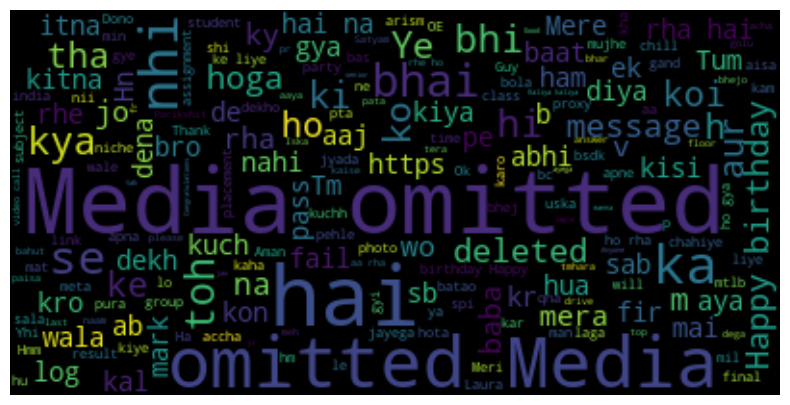

In [180]:
text = " ".join(review for review in df.message)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="black").generate(text)
# display the generated image
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [181]:
words = []
for mesaage in df.message:
    words.extend(mesaage.split())

In [182]:
len(words)

16439

In [183]:
extractor = URLExtract()

In [184]:
links = []
for message in df.message:
    links.extend(extractor.find_urls(message))

In [185]:
links

['https://gpay.app.goo.gl/XtyZNZ',
 'https://fb.watch/gLC2tyvAbC/',
 'https://gpay.app.goo.gl/aem7qX',
 'https://feedback.iitbhu.ac.in/login/',
 'https://youtube.com/shorts/5LKPa0Ks5fU?feature=share',
 'https://gpay.app.goo.gl/gCFRnE',
 'b.day',
 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTftiZ9RVmJEy_uxzzKSYcoAdz4_nIPFeTBxEn7cqsbYxEO3T6r4f0kp_Vq6LYffq2uYev6Kjqa8pNZ/pubhtml',
 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTftiZ9RVmJEy_uxzzKSYcoAdz4_nIPFeTBxEn7cqsbYxEO3T6r4f0kp_Vq6LYffq2uYev6Kjqa8pNZ/pubhtml',
 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQo0zSwi4Y3WAdQgcc9DGL_LH2ZODH4NQFHFOgaNqd1sO9cgHBrUVh-542nQPibABGk34ZRwbzTjOh4/pubhtml',
 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSsWChRhEqYOiFZLikp0SB7jQ3I0d_D0-tD-6Lk7UEFcVkOVlh8x_ljxm_jQoRbFoi9axGPCRcwxl3R/pubhtml',
 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTXKug5Bwy6QkR58qpUqdGY-mcDwSwSBf07hg-nN-ONHPVzZN0Ud2-GPg-Ux-chXdFDzetOqcmfqqMk/pubhtml',
 'https://forms.gle/SkeeAUDvAZ1gdcFv7',
 'https://docs

In [186]:
df

,time,user,message,year,month,day,hour,minute
0,2022-04-20 09:05:00,Aman IIT,<Media omitted>\n,2022,April,20,9,5
1,2022-04-22 11:50:00,Satvik Meta,<Media omitted>\n,2022,April,22,11,50
2,2022-09-06 14:02:00,Priyanshu Patel,@Ankit proxy maar dena\n,2022,September,6,14,2
3,2022-11-01 08:16:00,Parikshit Meta,<Media omitted>\n,2022,November,1,8,16
4,2022-11-12 10:58:00,Group notification,Messages and calls are end-to-end encrypted. N...,2022,November,12,10,58
...,...,...,...,...,...,...,...,...
3346,2023-05-17 11:11:00,Satvik Meta,Jidhr jao 500 profit🌚\n,2023,May,17,11,11
3347,2023-05-17 11:14:00,Aman IIT,"Mere sare ancestors saf ho gye 🥲,no profit no ...",2023,May,17,11,14
3348,2023-05-17 11:31:00,Aditya Meta,Ab to tum hi ancestor hai\nKaro kharcha\n,2023,May,17,11,31
3349,2023-05-17 15:06:00,Sagun IIT BHU META,https://youtu.be/WO-A_nWuD64\n,2023,May,17,15,6


In [187]:
df.sample(10)

,time,user,message,year,month,day,hour,minute
2178,2023-02-23 23:30:00,Aman IIT,<Media omitted>\n,2023,February,23,23,30
1778,2023-01-16 21:32:00,Parikshit Meta,baba sahi hai kya\n,2023,January,16,21,32
2291,2023-03-02 12:12:00,Aman IIT,Tushar bhai ... Congratulations 🎉🎉🎉...**29.5/3...,2023,March,2,12,12
888,2022-12-14 17:10:00,Satvik Meta,Bhai hmko ye smjh nhi aataa tmko itna itna no ...,2022,December,14,17,10
1497,2022-12-29 10:20:00,Sagun IIT BHU META,Mera kra dena ...\n,2022,December,29,10,20
1784,2023-01-16 21:47:00,Aditya Meta,4 to shi hai\n,2023,January,16,21,47
1927,2023-01-29 07:35:00,Aman IIT,कर रहा था ग़म-ए-जहाँ का हिसाब\nआज तुम याद बे-ह...,2023,January,29,7,35
3190,2023-05-12 15:48:00,Satvik Meta,Satyam gya\n,2023,May,12,15,48
2313,2023-03-07 13:42:00,Sarthak Modi META,Bhkk 🥲\n,2023,March,7,13,42
419,2022-12-06 16:53:00,Priyanshu Patel,،🎉🥳\n,2022,December,6,16,53


In [188]:
df['message'][2286]

'<Media omitted>\n'

In [189]:
df[df['user']=='Aman IIT'].shape[0]

738

In [190]:
df['user'].value_counts()

Satvik Meta              888
Aman IIT                 738
Aditya Meta              316
Sushil Meta              248
Sagun IIT BHU META       176
Piyush (IIT BHU)         151
Parikshit Meta           147
Sarthak Modi META        144
Rishit Meta              136
Priyanshu Patel          124
Satyam META               80
Avi Verma                 63
Rayunak Meta              49
Tushar Kamble IIT BHU     35
Anant Sharma              27
Group notification        14
Aditya Prakash Metaa      13
+91 82352 66244            2
Name: user, dtype: int64

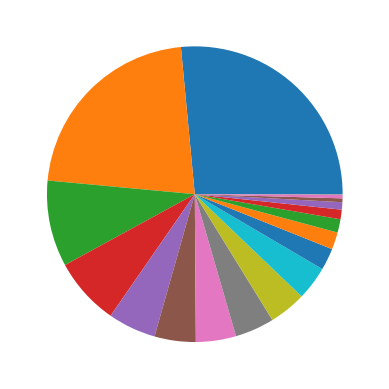

In [191]:
# CREATING THE PIECHART FROM THIS
plt.pie(df['user'].value_counts())
plt.show()

In [192]:
df[df['message'] == 'audio omitted\n']

,time,user,message,year,month,day,hour,minute


In [193]:
df['message'].value_counts()

<Media omitted>\n                                                                                                                                                                                          671
This message was deleted\n                                                                                                                                                                                  51
😂\n                                                                                                                                                                                                         22
++\n                                                                                                                                                                                                        16
                                                                                                                                                                            

In [194]:
dictt = dict(df['message'].value_counts())

In [195]:
dictt


{'<Media omitted>\n': 671,
 'This message was deleted\n': 51,
 '😂\n': 22,
 '++\n': 16,
 '': 14,
 '😂😂\n': 10,
 'Ok\n': 7,
 'Hmm\n': 7,
 'Hn\n': 6,
 'You deleted this message\n': 6,
 'Ha\n': 6,
 'Nhi\n': 5,
 '🙂\n': 5,
 'Aman IIT started a video call\n': 5,
 'Kaliya kaliya kaliya\n': 4,
 '?\n': 4,
 '@916207545427\n': 4,
 '🤣🤣\n': 4,
 '🥴🥴\n': 3,
 'Thanks bhai\n': 3,
 '😂😂😂\n': 3,
 '26\n': 3,
 '😆😆\n': 3,
 '@917004405828\n': 3,
 '😂😂😂😂\n': 3,
 'Acchaa\n': 3,
 '👍\n': 3,
 '🥲🥲\n': 3,
 '🥲\n': 3,
 'Hu\n': 3,
 '*Offers Day 1 Slot 1, Placements 2022-23*\nhttps://docs.google.com/spreadsheets/d/e/2PACX-1vTftiZ9RVmJEy_uxzzKSYcoAdz4_nIPFeTBxEn7cqsbYxEO3T6r4f0kp_Vq6LYffq2uYev6Kjqa8pNZ/pubhtml\n': 2,
 'Bsdk\n': 2,
 'Ohkk\n': 2,
 'Good\n': 2,
 '@919370130840 \n********************\n\nAMAN KUMAR\n20144005 \n\n********************\n': 2,
 'Sarthak Modi META started a video call\n': 2,
 'धन्यवाद\n': 2,
 '@919569414600\n': 2,
 'Hnn\n': 2,
 'You started a video call\n': 2,
 '🥳\n': 2,
 'Arism\n': 2,
 'Accha\n': 2,

In [196]:
audio_sum = 0
sticker_sum = 0
image_sum = 0
video_sum = 0

for p,val in dictt.items():
    if 'audio' in p:
        audio_sum += val
for p,val in dictt.items():
    if 'sticker' in p:
        sticker_sum += val
for p,val in dictt.items():        
    if 'video' in p:
        video_sum += val
for p,val in dictt.items():        
    if 'image' in p:
        image_sum += val
  

In [197]:
image_sum

0

In [198]:
for message in df['message']:
    message.extend(message.spli)

AttributeError: 'str' object has no attribute 'extend'

In [199]:
df['user'].value_counts().head()

Satvik Meta           888
Aman IIT              738
Aditya Meta           316
Sushil Meta           248
Sagun IIT BHU META    176
Name: user, dtype: int64

In [200]:
name = df['user'].value_counts().head().index
count = df['user'].value_counts().head().values

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


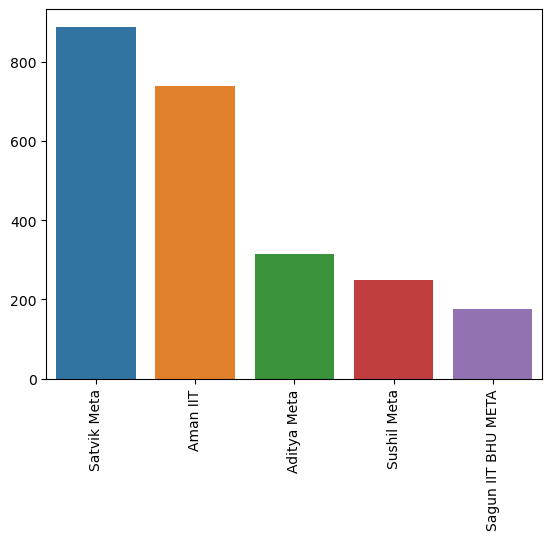

In [201]:
sns.barplot(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [202]:
percent = round((df['user'].value_counts()/df.shape[0])*100,2).reset_index()

In [203]:
percent.columns = ['User','Percent']

ValueError: could not convert string to float: 'Satvik Meta'

In [205]:
words = []
for message in df['message']:
    words.extend(message.split())

In [206]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,<Media,671
1,omitted>,671
2,hai,557
3,ka,193
4,nhi,165
5,me,159
6,se,146
7,to,137
8,ho,123
9,rha,120


In [207]:
temp = df[df['user']!='Group notification']
temp = temp[temp['message']!= '<Media omitted>\n']
temp

,time,user,message,year,month,day,hour,minute
2,2022-09-06 14:02:00,Priyanshu Patel,@Ankit proxy maar dena\n,2022,September,6,14,2
5,2022-11-12 16:04:00,Satyam META,Help me be among the top 8 lakh teams and get ...,2022,November,12,16,4
7,2022-11-12 23:21:00,Aditya Meta,Jamane ko jis din yaad aapki aa gyi\nDirect ga...,2022,November,12,23,21
8,2022-11-12 23:27:00,Sushil Meta,https://fb.watch/gLC2tyvAbC/\n,2022,November,12,23,27
10,2022-11-13 11:10:00,Sushil Meta,Ye maliyo mtlb kya hota hai\n,2022,November,13,11,10
...,...,...,...,...,...,...,...,...
3346,2023-05-17 11:11:00,Satvik Meta,Jidhr jao 500 profit🌚\n,2023,May,17,11,11
3347,2023-05-17 11:14:00,Aman IIT,"Mere sare ancestors saf ho gye 🥲,no profit no ...",2023,May,17,11,14
3348,2023-05-17 11:31:00,Aditya Meta,Ab to tum hi ancestor hai\nKaro kharcha\n,2023,May,17,11,31
3349,2023-05-17 15:06:00,Sagun IIT BHU META,https://youtu.be/WO-A_nWuD64\n,2023,May,17,15,6


In [208]:
emojis =[]
for message in df.message:
    emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI])

AttributeError: module 'emoji' has no attribute 'UNICODE_EMOJI'

In [214]:
df['num_month'] = df['time'].dt.month

In [231]:
timeline = df.groupby(['year','month']).count()['message'].reset_index()

In [234]:
time =[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+'-'+str(timeline['year'][i]))

In [236]:
timeline['time'] = time

In [237]:
timeline

,year,month,message,time
0,2022,April,2,April-2022
1,2022,December,1297,December-2022
2,2022,November,228,November-2022
3,2022,September,1,September-2022
4,2023,April,397,April-2023
5,2023,February,215,February-2023
6,2023,January,475,January-2023
7,2023,March,486,March-2023
8,2023,May,250,May-2023


<function matplotlib.pyplot.show(close=None, block=None)>

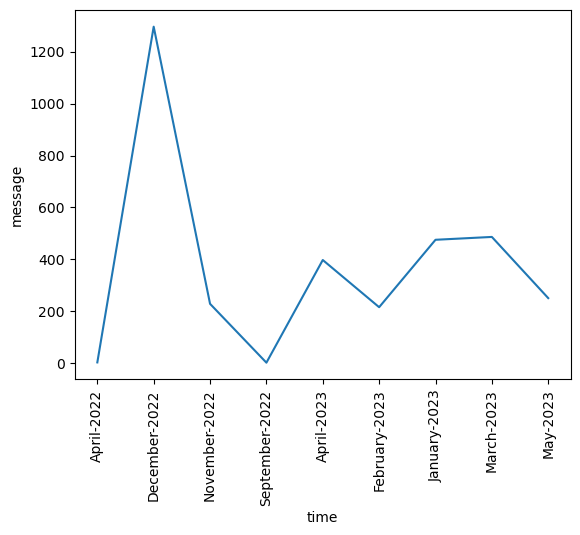

In [242]:
sns.lineplot(x=timeline['time'],y=timeline['message'])
plt.xticks(rotation='vertical')
plt.show

In [244]:
df['date'] = df['time'].dt.date

In [255]:
daily_timeline = df.groupby(['date']).count()['message'].reset_index()

<AxesSubplot:xlabel='date', ylabel='message'>

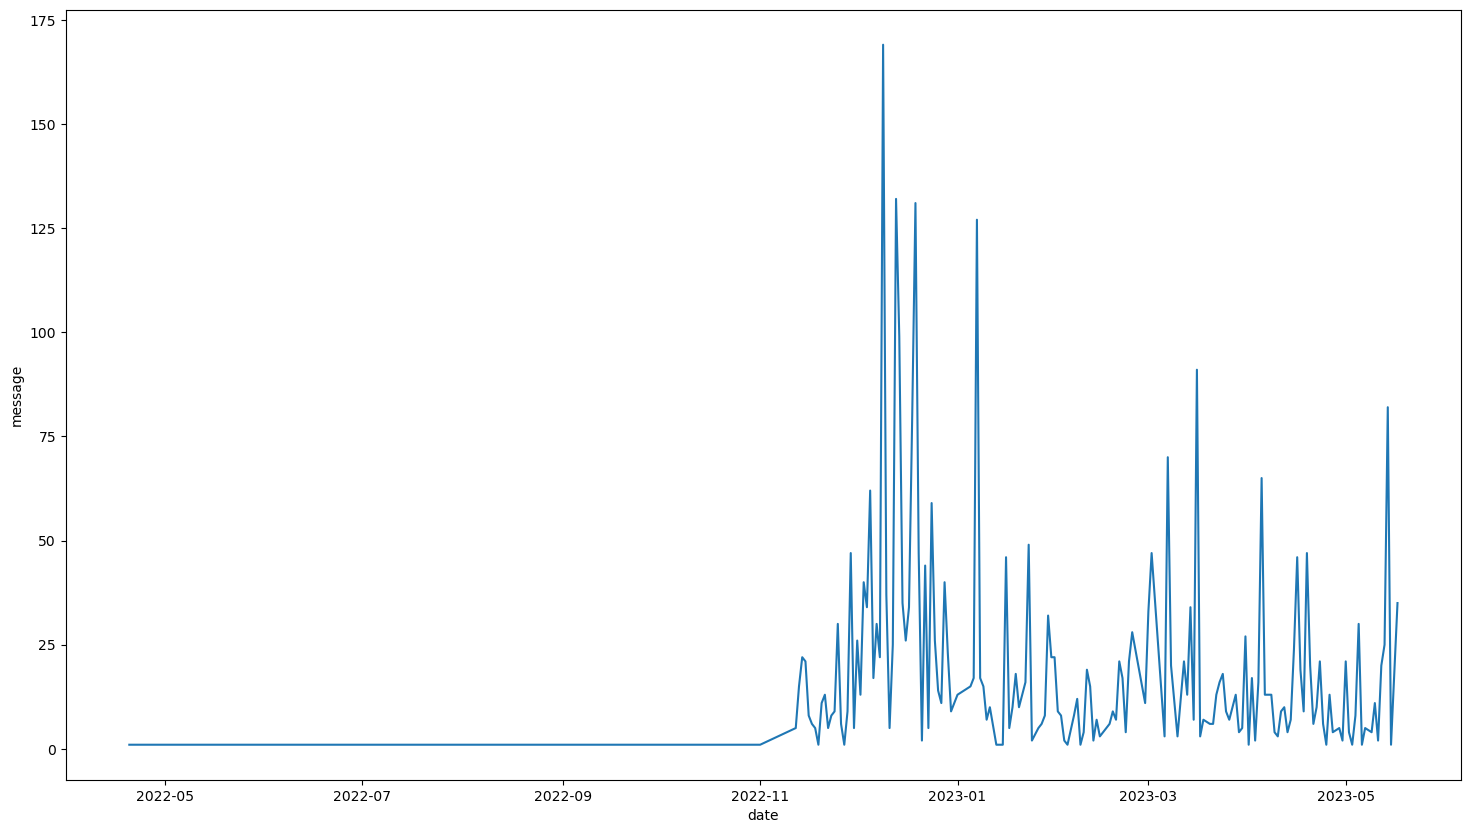

In [259]:
plt.figure(figsize=(18,10))
sns.lineplot(x=daily_timeline['date'],y=daily_timeline['message'])

In [263]:
df['day_name'] = df['time'].dt.day_name()

In [267]:
daily = df['day_name'].value_counts().reset_index()

In [268]:
daily

,index,day_name
0,Monday,528
1,Tuesday,527
2,Wednesday,486
3,Sunday,465
4,Friday,461
5,Thursday,446
6,Saturday,438


In [273]:
df.groupby(['month']).count()['message'].reset_index()

,month,message
0,April,399
1,December,1297
2,February,215
3,January,475
4,March,486
5,May,250
6,November,228
7,September,1


In [274]:
df.head()

,time,user,message,year,month,day,hour,minute,num_month,date,day_name
0,2022-04-20 09:05:00,Aman IIT,<Media omitted>\n,2022,April,20,9,5,4,2022-04-20,Wednesday
1,2022-04-22 11:50:00,Satvik Meta,<Media omitted>\n,2022,April,22,11,50,4,2022-04-22,Friday
2,2022-09-06 14:02:00,Priyanshu Patel,@Ankit proxy maar dena\n,2022,September,6,14,2,9,2022-09-06,Tuesday
3,2022-11-01 08:16:00,Parikshit Meta,<Media omitted>\n,2022,November,1,8,16,11,2022-11-01,Tuesday
4,2022-11-12 10:58:00,Group notification,Messages and calls are end-to-end encrypted. N...,2022,November,12,10,58,11,2022-11-12,Saturday


In [295]:
period = []
for i in range(df.shape[0]):
    if df['hour'][i]==23:
        period.append(str(df['hour'][i])+'-'+'00')
    else:
        period.append(str(df['hour'][i])+'-'+str(df['hour'][i]+1))

In [296]:
df['period']=period

In [299]:
df[df['period']=="23-00"]


,time,user,message,year,month,day,hour,minute,num_month,date,day_name,period
7,2022-11-12 23:21:00,Aditya Meta,Jamane ko jis din yaad aapki aa gyi\nDirect ga...,2022,November,12,23,21,11,2022-11-12,Saturday,23-00
8,2022-11-12 23:27:00,Sushil Meta,https://fb.watch/gLC2tyvAbC/\n,2022,November,12,23,27,11,2022-11-12,Saturday,23-00
38,2022-11-14 23:02:00,Sushil Meta,Mera cbi hai abhi tak nhj ya\n,2022,November,14,23,2,11,2022-11-14,Monday,23-00
39,2022-11-14 23:03:00,Sushil Meta,Nhi aya*\n,2022,November,14,23,3,11,2022-11-14,Monday,23-00
40,2022-11-14 23:18:00,Aditya Meta,<Media omitted>\n,2022,November,14,23,18,11,2022-11-14,Monday,23-00
...,...,...,...,...,...,...,...,...,...,...,...,...
3076,2023-04-25 23:47:00,Rishit Meta,<Media omitted>\n,2023,April,25,23,47,4,2023-04-25,Tuesday,23-00
3089,2023-04-26 23:56:00,Satyam META,<Media omitted>\n,2023,April,26,23,56,4,2023-04-26,Wednesday,23-00
3099,2023-04-30 23:29:00,Aditya Meta,<Media omitted>\n,2023,April,30,23,29,4,2023-04-30,Sunday,23-00
3100,2023-04-30 23:29:00,Aditya Meta,@919454372085\n,2023,April,30,23,29,4,2023-04-30,Sunday,23-00


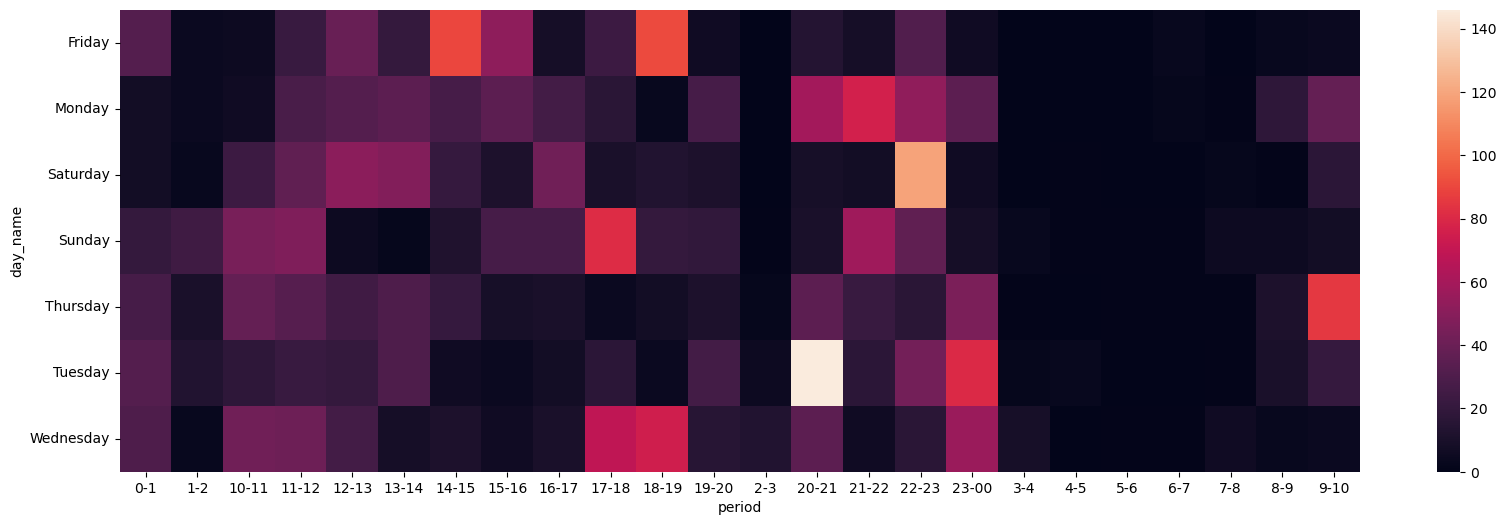

In [300]:
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()